In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import linalg


In [7]:
df = pd.DataFrame({'length':[7,4,6,8,8,7,5,9,7,8], 'width' : [4,1,3,6,5,2,3,5,4,2],'thickness':[3,8,5,1,7,9,3,8,5,2]})

In [8]:
df # conveted data points  into dataframe 

,length,width,thickness
0,7,4,3
1,4,1,8
2,6,3,5
3,8,6,1
4,8,5,7
5,7,2,9
6,5,3,3
7,9,5,8
8,7,4,5
9,8,2,2


In [17]:
df_new.to_excel('sample_data.xlsx', sheet_name='sheet1', index=False) # saving data to excel 

# a) Write a function for determining PCs of the above dataset X. Standardize your data i.e. use zero mean and normalized data using the ”Standardize” function shown in Tutorial.

In [103]:
def standardize(a):                     #a here is the input data
    mean = sum(a)/len(a)                #computing mean
    var = sum((a-mean)**2)/len(a)       #computing variance
    snd = (a-mean)/(var**0.5)           #compute zero mean for normalizating data
    return snd    




In [104]:
x_standardised = df.values    # Extracting values from columns of data 

In [105]:
x_scaled = standardize(x_standardised)    # Applying transformation of standardisation 

In [106]:
x_scaled

array([[ 0.06917145,  0.33333333, -0.78867155],
       [-2.00597195, -1.66666667,  1.08911786],
       [-0.62254302, -0.33333333, -0.03755579],
       [ 0.76088591,  1.66666667, -1.53978732],
       [ 0.76088591,  1.        ,  0.71355998],
       [ 0.06917145, -1.        ,  1.46467574],
       [-1.31425748, -0.33333333, -0.78867155],
       [ 1.45260037,  1.        ,  1.08911786],
       [ 0.06917145,  0.33333333, -0.03755579],
       [ 0.76088591, -1.        , -1.16422944]])

In [37]:
def pca(X):
  # Add a functionality of adjusting X for zero mean for each column and normalize each column using variance.
    n, m = X.shape
  # Compute covariance matrix
    C = np.dot(X.T, X) / (n-1)
  # Eigen decomposition
    eigen_vals, eigen_vecs = np.linalg.eig(C)
  # Project X onto PC space
    X_pca = np.dot(X, eigen_vecs)
    return eigen_vecs,eigen_vals,X_pca

In [107]:
pca(x_scaled)

(array([[-0.64200458, -0.66321742,  0.38467229],
        [-0.68636164,  0.72074503,  0.09713033],
        [ 0.34166917,  0.20166619,  0.91792861]]),
 array([1.9653046 , 0.33794439, 1.03008435]),
 array([[-0.54266035,  0.03532425, -0.66495907],
        [ 2.80389723,  0.34879208,  0.06620673],
        [ 0.61563102,  0.1650593 , -0.30632536],
        [-2.15852616,  0.38608588, -0.95883922],
        [-0.93105243,  0.36001316,  1.04481917],
        [ 1.1423878 , -0.47124516,  1.27394577],
        [ 0.80308178,  0.47234173, -1.2618794 ],
        [-1.24681973, -0.0230066 ,  1.65563789],
        [-0.28602725,  0.1867989 ,  0.02451158],
        [-0.1999119 , -1.46016354, -0.87311811]]))

# (b) Show the principal vectors i.e. matrix P.

In [108]:
n,m = x_scaled.shape         # storing the vallues of matrix dimensions 


In [109]:
C = np.dot(x_scaled.T,x_scaled) / (n-1)
print(C)                           # covariance matrix

[[ 1.11111111  0.74295257 -0.11257082]
 [ 0.74295257  1.11111111 -0.31991968]
 [-0.11257082 -0.31991968  1.11111111]]


In [110]:
eigen_values, eigen_vectors = np.linalg.eig(C) # eigen values computing
print("eigen values -",eigen_values)            
print("eigen vectors - ",eigen_vectors)


eigen values - [1.9653046  0.33794439 1.03008435]
eigen vectors -  [[-0.64200458 -0.66321742  0.38467229]
 [-0.68636164  0.72074503  0.09713033]
 [ 0.34166917  0.20166619  0.91792861]]


In [111]:
# sorting the values
index_sorting = np.argsort(eigen_values)[::-1] 
 
eigenvals_sorted = eigen_values[index_sorting]      # sorted eigen values and vectors 

eigenvecs_sorting = eigen_vectors[:,index_sorting]

In [112]:
eigenvals_sorted

array([1.9653046 , 1.03008435, 0.33794439])

In [113]:
eigenvecs_sorting

array([[-0.64200458,  0.38467229, -0.66321742],
       [-0.68636164,  0.09713033,  0.72074503],
       [ 0.34166917,  0.91792861,  0.20166619]])

In [114]:
P= eigenvecs_sorting.T # principal vectors 

In [115]:
P

array([[-0.64200458, -0.68636164,  0.34166917],
       [ 0.38467229,  0.09713033,  0.91792861],
       [-0.66321742,  0.72074503,  0.20166619]])

# c) Show the transformed data Y .

In [116]:
#transformed data

Y = np.dot(x_scaled,eigenvecs_sorting)        
Y

array([[-0.54266035, -0.66495907,  0.03532425],
       [ 2.80389723,  0.06620673,  0.34879208],
       [ 0.61563102, -0.30632536,  0.1650593 ],
       [-2.15852616, -0.95883922,  0.38608588],
       [-0.93105243,  1.04481917,  0.36001316],
       [ 1.1423878 ,  1.27394577, -0.47124516],
       [ 0.80308178, -1.2618794 ,  0.47234173],
       [-1.24681973,  1.65563789, -0.0230066 ],
       [-0.28602725,  0.02451158,  0.1867989 ],
       [-0.1999119 , -0.87311811, -1.46016354]])

In [117]:
principal_component1 = x_scaled.dot(eigenvecs_sorting.T[0]) # calculating the principal components 3 componets for each 
principal_component2 = x_scaled.dot(eigenvecs_sorting.T[1])   # calculating the principal components 
principal_component3 = x_scaled.dot(eigenvecs_sorting.T[2])  # calculating the principal components  

 

In [118]:
data_y= pd.DataFrame({'Pc1':principal_component1, 'Pc2':principal_component2, 'Pc3':principal_component3})

In [119]:
data_y              # dataframe of Pcs 

,Pc1,Pc2,Pc3
0,-0.542660,-0.664959,0.035324
1,2.803897,0.066207,0.348792
2,0.615631,-0.306325,0.165059
3,-2.158526,-0.958839,0.386086
4,-0.931052,1.044819,0.360013
5,1.142388,1.273946,-0.471245
6,0.803082,-1.261879,0.472342
7,-1.246820,1.655638,-0.023007
8,-0.286027,0.024512,0.186799
9,-0.199912,-0.873118,-1.460164


#  (d) Determine the variances along the principal directions.


In [125]:
variance_along_pdir =[]
for i in eigenvals_sorted:
    variance_along_pdir.append(i / np.sum(eigen_values))
     
     # calculating the variance for each eigevalue 

In [126]:
print(variance_along_pdir)  # required variance 

[0.5895913787011413, 0.3090253056329647, 0.10138331566589397]


## (e) Determine the principal axes using Scikitlearn or Numpy and compare with your solution. Does your solution compare well with that from the python library functions ? Why not? What is the difference?

In [74]:
from sklearn.decomposition import PCA      # using library function 

In [75]:
Pca = PCA(n_components=3)  # using inbuilt class

In [128]:
Pca.fit_transform(x_scaled)   # fit the model and apply transformation of pCA 

array([[-0.54266035, -0.66495907, -0.03532425],
       [ 2.80389723,  0.06620673, -0.34879208],
       [ 0.61563102, -0.30632536, -0.1650593 ],
       [-2.15852616, -0.95883922, -0.38608588],
       [-0.93105243,  1.04481917, -0.36001316],
       [ 1.1423878 ,  1.27394577,  0.47124516],
       [ 0.80308178, -1.2618794 , -0.47234173],
       [-1.24681973,  1.65563789,  0.0230066 ],
       [-0.28602725,  0.02451158, -0.1867989 ],
       [-0.1999119 , -0.87311811,  1.46016354]])

In [129]:
Pca.components_                # 3 principal components for each eigen vector 

array([[-0.64200458, -0.68636164,  0.34166917],
       [ 0.38467229,  0.09713033,  0.91792861],
       [ 0.66321742, -0.72074503, -0.20166619]])

In [130]:
Pca.explained_variance_ratio_

array([0.58959138, 0.30902531, 0.10138332])

The principal axes with Scikit   do not differed  much from my solution .
however it differs in the direction although that doesnot concern us.
The vectors that identify these axes are the major components after processing the input data using pca.


## (g) How many PCs are sufficient to represent the data in reduced dimensions with 95 % accuracy. Show how did you come up with you answer.

In [144]:
import seaborn as sns  # seaborn library 

In [131]:
Pca.explained_variance_ratio_ 

array([0.58959138, 0.30902531, 0.10138332])


The first two  PCs  are covering almost 90% of the variance. So 2 dimensions would be optimum choice to go ahead with .
The other 10% can be represented using the 3rd PC
Below is the Scree Plot 

In [ ]:
PC_components = np.arange(Pca.n_components_) + 1

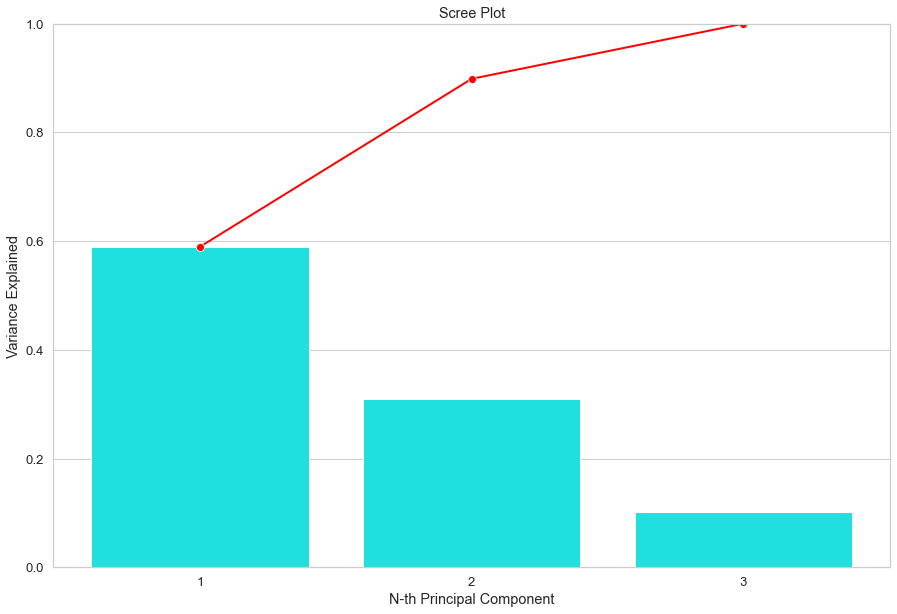

In [151]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(15, 10))     
_ = sns.barplot(x=PC_components, y=Pca.explained_variance_ratio_, color='cyan')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(Pca.explained_variance_ratio_), color='red', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

### The chart informs us that using 2 principal components instead of 3 is fine because they can capture ~ 90% of the variance.